 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = pd.read_csv(r'C:\Users\admin\Homework3\whale_returns.csv', parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_csv.dropna(inplace = True)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = pd.read_csv(r'C:\Users\admin\Homework3\algo_returns.csv', parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns=algo_returns_csv.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = pd.read_csv(r'C:\Users\admin\Homework3\sp500_history.csv', parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_history_csv.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history_csv['Close'] = sp500_history_csv['Close'].apply(lambda x: x.replace('$', ''))

#convert the columne values from str to float
sp500_history_csv['Close']=pd.to_numeric(sp500_history_csv['Close'],downcast="float")
sp500_history_csv.head()

,Close
Date,
2019-04-23,2933.679932
2019-04-22,2907.969971
2019-04-18,2905.030029
2019-04-17,2900.449951
2019-04-16,2907.060059


In [12]:
# Calculate Daily Returns
sp500_history=sp500_history_csv.sort_index() 
sp500_return=(sp500_history - sp500_history.shift(1)) / sp500_history.shift(1)
sp500_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_return.dropna(inplace=True)
sp500_return.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
sp500_return=sp500_return.rename(columns={"Close":"S&P 500"})
sp500_return.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
combine_return=pd.concat([whale_returns_csv,algo_returns,sp500_return],axis='columns',join="inner")
combine_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

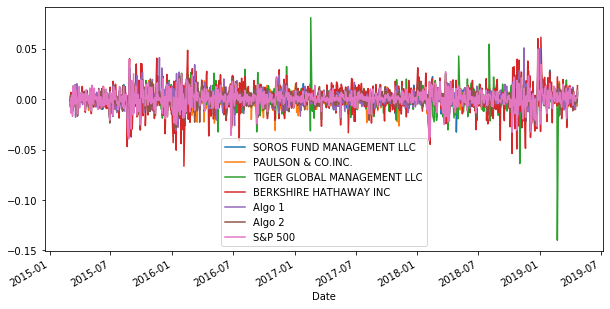

In [16]:
# Plot daily returns
combine_return.plot(figsize=(10,5))

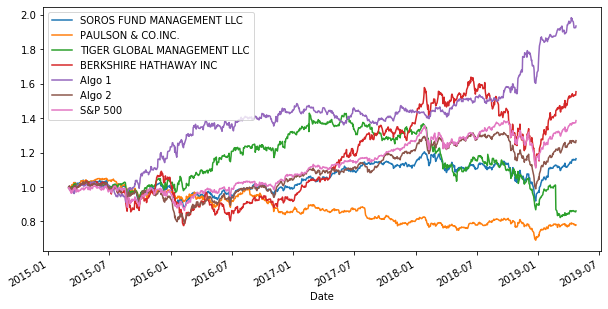

In [17]:
# Plot cumulative returns
cumulative_returns = (1 + combine_return).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(10,5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

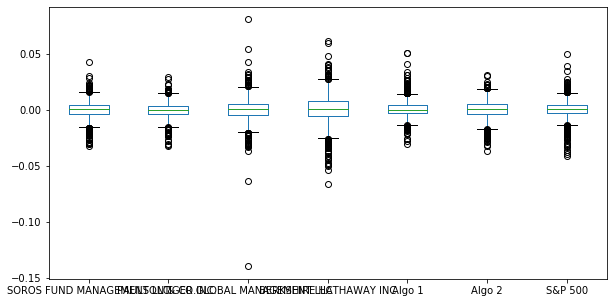

In [18]:
# Box plot to visually show risk
combine_return.plot.box(figsize=(10,5))

In [19]:
# Daily Standard Deviations
daily_std=combine_return.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk=combine_return['S&P 500'].std()
# True implies that those portfolio are riskier then S&P 500
daily_std>sp500_risk 

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                         True
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

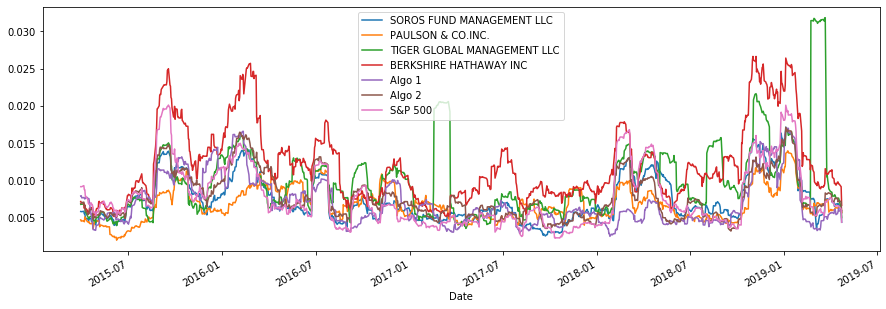

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combine_return.rolling(window=21).std().plot(figsize=(15,5))

In [23]:
# Construct a correlation table
combine_return.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance=combine_return['PAULSON & CO.INC. '].cov(combine_return['S&P 500'])
covariance


4.0233154417574816e-05

In [25]:
variance = combine_return['PAULSON & CO.INC. '].var()
variance

4.932363900651133e-05

In [26]:
beta_palco=covariance/variance
beta_palco

0.815697203774108

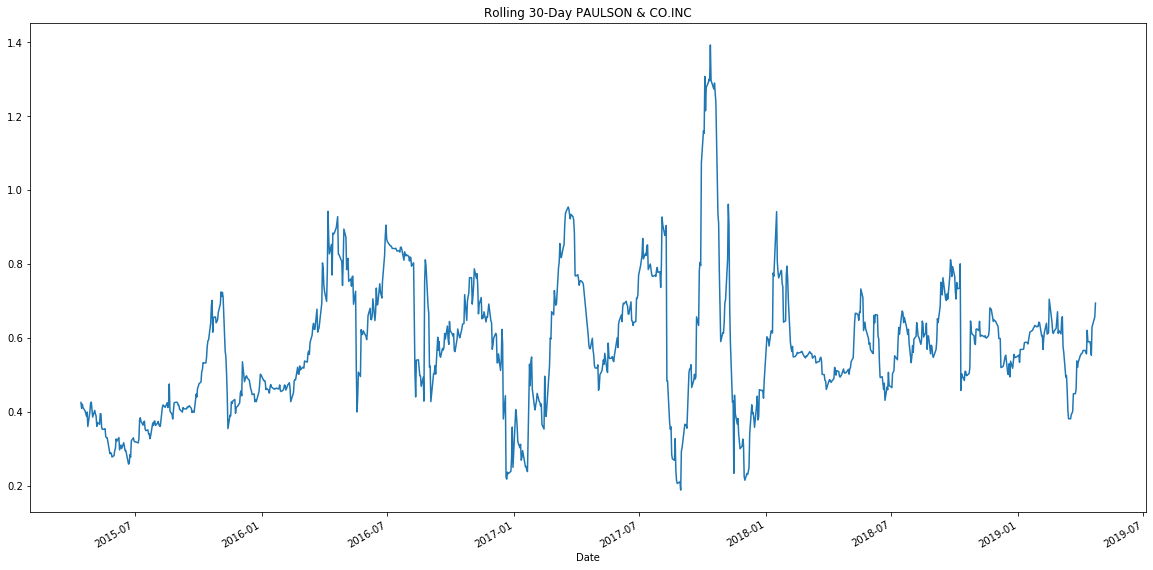

In [27]:
# Beta (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance = combine_return['PAULSON & CO.INC. '].rolling(window=30).cov(combine_return['S&P 500'])
rolling_variance = combine_return['S&P 500'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day PAULSON & CO.INC')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

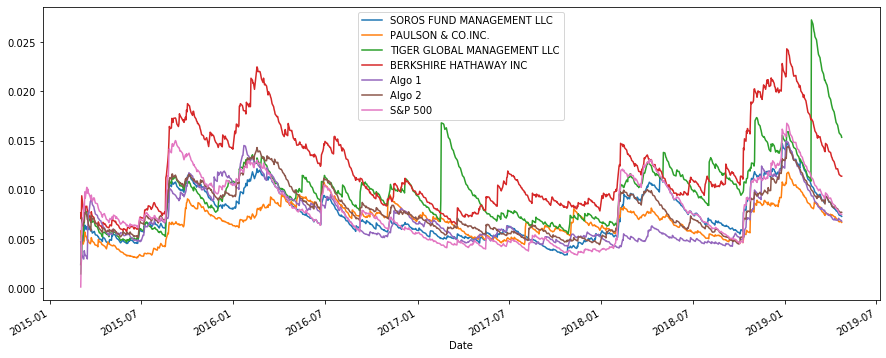

In [28]:
combine_return.ewm(halflife=21).std().plot(figsize=(15,6))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [62]:
# Annualized Sharpe Ratios
sharpe_ratio=combine_return.mean()/combine_return.std()
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.027132
PAULSON & CO.INC.              0.016299
TIGER GLOBAL MANAGEMENT LLC   -0.065150
BERKSHIRE HATHAWAY INC         0.010064
Algo 1                         0.128235
Algo 2                         0.005078
S&P 500                        0.036840
custom                         0.058781
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [35]:
a_sharpe_ratio=sharpe_ratio* np.sqrt(252)
a_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

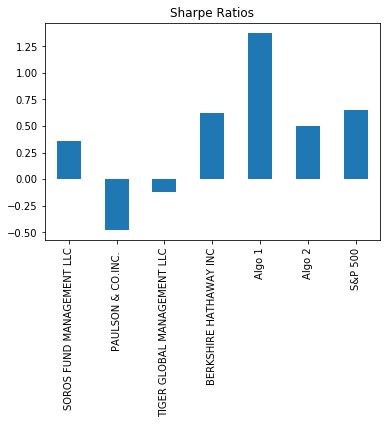

In [36]:
# Visualize the sharpe ratios as a bar plot
a_sharpe_ratio.plot(kind='bar',title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Read the first stock
goog_returns_csv = pd.read_csv(r'C:\Users\admin\Homework3\goog_historical.csv', parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
goog_returns_csv.sort_index(ascending=True)
goog_returns_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [38]:
# Read the second stock
aapl_returns_csv = pd.read_csv(r'C:\Users\admin\Homework3\aapl_historical.csv', parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
aapl_returns_csv.sort_index(ascending=True)
aapl_returns_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [39]:
# Read the third stock
cost_returns_csv = pd.read_csv(r'C:\Users\admin\Homework3\cost_historical.csv', parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
cost_returns_csv.sort_index(ascending=True)
cost_returns_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [42]:
# Concatenate all stocks into a single DataFrame
combine_prices=pd.concat([goog_returns_csv,aapl_returns_csv,cost_returns_csv],axis="rows",join="inner")
combine_prices.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [43]:
# Reset the index
df_price=combine_prices.reset_index()
df_price

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40
...,...,...,...
745,2018-05-17,COST,199.60
746,2018-05-16,COST,198.71
747,2018-05-15,COST,195.48
748,2018-05-14,COST,195.88


In [44]:
# Pivot so that each column of prices represents a unique symbol
p_df_price=df_price.pivot_table(values='NOCP',index="Trade DATE",columns='Symbol')
p_df_price.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [45]:
# Drop Nulls
p_return=p_df_price.pct_change()
p_return.dropna(inplace=True)
p_return.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_return=p_return.dot(weights)
my_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
combine_return['custom']=my_return
combine_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_return.dropna(inplace=True)
combine_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000883,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [51]:
# Risk
daily_custom_std=combine_return.std()
daily_custom_std
annual_custom_std = daily_custom_std * np.sqrt(252)
annual_custom_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
custom                         0.211496
dtype: float64

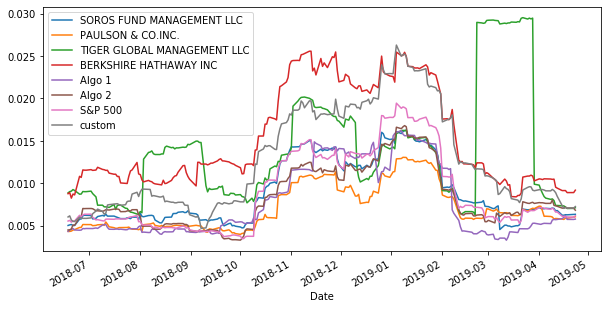

In [52]:
# Rolling
combine_return.rolling(window=25).std().plot(figsize=(10,5))

In [54]:
# Beta
covariance_custom=combine_return['custom'].cov(combine_return['S&P 500'])
covariance_custom
variance_custom = combine_return['custom'].var()
variance_custom
beta_custom=covariance_custom/variance_custom
beta_custom

0.6268309624441527

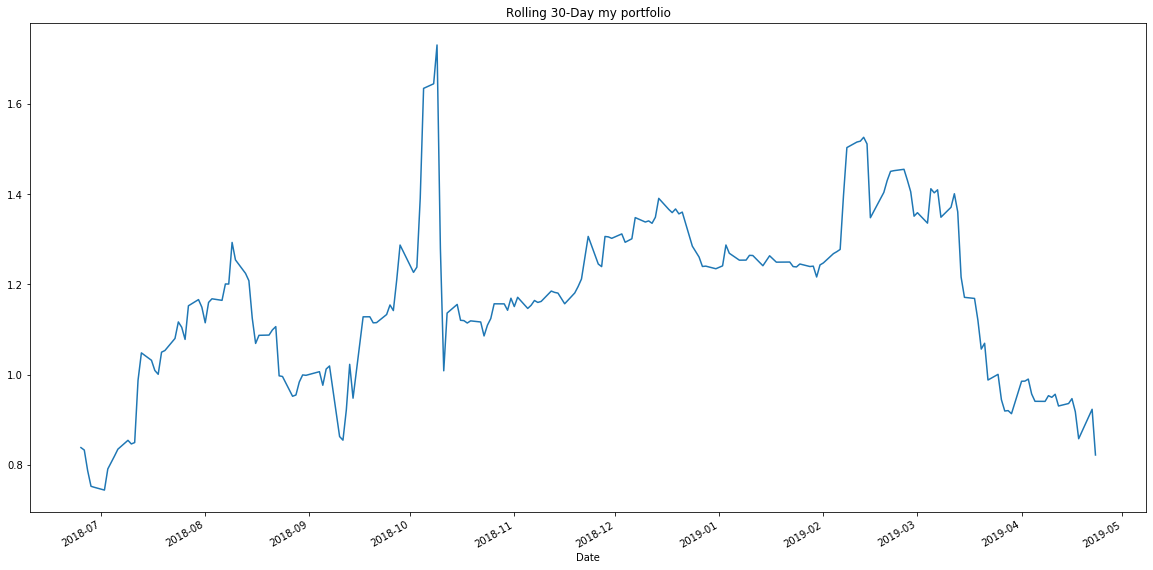

In [71]:
rolling_covariance_cus = combine_return['custom'].rolling(window=30).cov(combine_return['S&P 500'])
rolling_variance_cus = combine_return['S&P 500'].rolling(window=30).var()
rolling_beta_cus = rolling_covariance_cus / rolling_variance_cus
rolling_beta_cus.plot(figsize=(20, 10), title='Rolling 30-Day my portfolio')

In [55]:
# Annualized Sharpe Ratios
sharpe_ratio_cus=combine_return.mean()/combine_return.std()
sharpe_ratio_cus
a_sharpe_ratio_cus=sharpe_ratio_cus* np.sqrt(252)
a_sharpe_ratio_cus

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
custom                         0.933123
dtype: float64

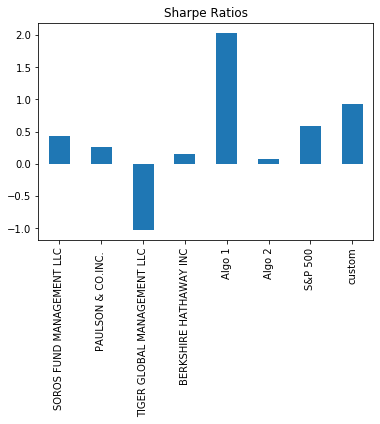

In [56]:
# Visualize the sharpe ratios as a bar plot
a_sharpe_ratio_cus.plot(kind='bar',title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [58]:
# YOUR CODE HERE
combine_return.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766681,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852304,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289357,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766681,0.481030,0.852304,0.289357,0.875721,1.000000,0.871875
custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000
